In [1]:
import pandas as pd
import urllib
from urllib.parse import urlparse
import httplib2 as http
import json
import requests
import time
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
%matplotlib inline

%load_ext autoreload
%autoreload 2

from my_functions import Distance_Data

pd.set_option('display.float_format', lambda x: '%.2f' % x)
pd.set_option('display.max_columns', None)

# Getting Data

## LTA API
You can read more about LTA's Datamall API here:
https://datamall.lta.gov.sg/content/dam/datamall/datasets/LTA_DataMall_API_User_Guide.pdf

### Bus Stop Data

In [2]:
# Create an empty dataframe to store the data
stop_df = pd.DataFrame(columns = ['BusStopCode', 'RoadName', \
                                    'Description', 'Latitude', \
                                    'Longitude'])

In [3]:
# Extracting bus stop data
api_file_path = 'data/api_key.txt'
with open(api_file_path, 'r') as f:
            api_key = f.read().strip()
uri =  'http://datamall2.mytransport.sg/ltaodataservice/'
path = 'BusStops'
headers = { 'AccountKey' : api_key, 'accept' : 'application/json'}
method = 'GET'
h = http.Http()

for i in range(0,5500,500): # There are about 5000+ bus stops currently and they return a limit of 500 at a go
    skip = '?$skip=' + str(i)
    target = urlparse(uri + path + skip)
    print(f'The target url is {target.geturl()}')
    response, content = h.request(target.geturl(),method,'',headers)
    print(response)
    data = json.loads(content)
    df = pd.DataFrame(data['value'])
    stop_df =  pd.concat([stop_df, df], ignore_index=True)

The target url is http://datamall2.mytransport.sg/ltaodataservice/BusStops?$skip=0
{'date': 'Sun, 12 Mar 2023 02:14:25 GMT', 'content-type': 'application/json;charset=UTF-8', 'transfer-encoding': 'chunked', 'connection': 'keep-alive', 'cache-control': 'no-store', 'content-language': 'en-SG', 'status': '200', 'content-location': 'http://datamall2.mytransport.sg/ltaodataservice/BusStops?$skip=0'}
The target url is http://datamall2.mytransport.sg/ltaodataservice/BusStops?$skip=500
{'date': 'Sun, 12 Mar 2023 02:14:25 GMT', 'content-type': 'application/json;charset=UTF-8', 'transfer-encoding': 'chunked', 'connection': 'keep-alive', 'cache-control': 'no-store', 'content-language': 'en-SG', 'status': '200', 'content-location': 'http://datamall2.mytransport.sg/ltaodataservice/BusStops?$skip=500'}
The target url is http://datamall2.mytransport.sg/ltaodataservice/BusStops?$skip=1000
{'date': 'Sun, 12 Mar 2023 02:14:25 GMT', 'content-type': 'application/json;charset=UTF-8', 'transfer-encoding': '

In [4]:
print(f'The dataframe has a shape of {stop_df.shape}')

The dataframe has a shape of (5083, 5)


In [5]:
# explore the data gotten from the API
stop_df.head()

,BusStopCode,RoadName,Description,Latitude,Longitude
0,01012,Victoria St,Hotel Grand Pacific,1.30,103.85
1,01013,Victoria St,St. Joseph's Ch,1.30,103.85
2,01019,Victoria St,Bras Basah Cplx,1.30,103.85
3,01029,Nth Bridge Rd,Opp Natl Lib,1.30,103.85
4,01039,Nth Bridge Rd,Bugis Cube,1.30,103.86


In [6]:
stop_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5083 entries, 0 to 5082
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   BusStopCode  5083 non-null   object 
 1   RoadName     5083 non-null   object 
 2   Description  5083 non-null   object 
 3   Latitude     5083 non-null   float64
 4   Longitude    5083 non-null   float64
dtypes: float64(2), object(3)
memory usage: 198.7+ KB


In [7]:
# check for duplicates
stop_df.duplicated().sum()

0

In [8]:
# check for null values
stop_df.isnull().sum()

BusStopCode    0
RoadName       0
Description    0
Latitude       0
Longitude      0
dtype: int64

In [9]:
# check for unique values
stop_df.nunique()

BusStopCode    5083
RoadName        838
Description    4542
Latitude       5083
Longitude      5082
dtype: int64

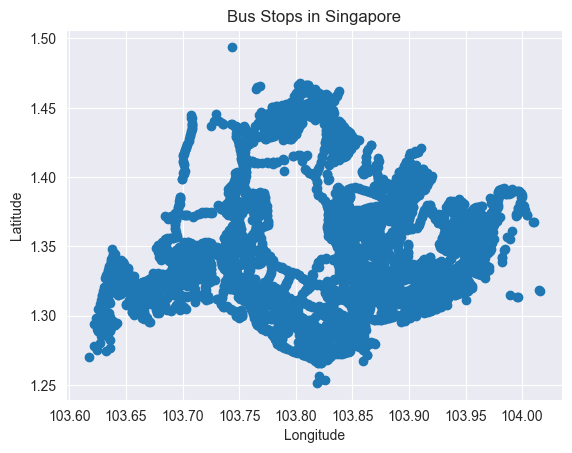

In [7]:
# plot latitude and longitude on a scatter plot to visualize
plt.scatter(stop_df['Longitude'],stop_df['Latitude'])
plt.title('Bus Stops in Singapore')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

In [4]:
# always export the data to a file locally if possible in case the kernel crashes

# file name
csv_file_name = 'data/bus_stops.csv'

# export data to csv
stop_df.to_csv(csv_file_name)

### Bus Traffic Data

In [23]:
# Extracting bus stop data
api_file_path = 'data/api_key.txt'
with open(api_file_path, 'r') as f:
            api_key = f.read().strip()
uri =  'http://datamall2.mytransport.sg/ltaodataservice/'
path = 'PV/Bus'
headers = { 'AccountKey' : api_key, 'accept' : 'application/json'}
method = 'GET'
h = http.Http()

for i in ['202211','202212','202301']: # only past 3 months are available
    skip = '?Date=' + i
    target = urlparse(uri + path + skip)
    print(f'The target url is {target.geturl()}')
    response, content = h.request(target.geturl(),method,'',headers)
    print(response)
    data = json.loads(content)
    print(data['value'])

The target url is http://datamall2.mytransport.sg/ltaodataservice/PV/Bus?Date=202212
{'date': 'Sun, 12 Mar 2023 02:28:41 GMT', 'content-type': 'application/json;charset=UTF-8', 'transfer-encoding': 'chunked', 'connection': 'keep-alive', 'cache-control': 'no-store', 'content-language': 'en-US', 'status': '200', 'content-location': 'http://datamall2.mytransport.sg/ltaodataservice/PV/Bus?Date=202212'}
[{'Link': 'https://ltafarecard.s3.ap-southeast-1.amazonaws.com/202212/transport_node_bus_202212.zip?X-Amz-Security-Token=IQoJb3JpZ2luX2VjEOL%2F%2F%2F%2F%2F%2F%2F%2F%2F%2FwEaDmFwLXNvdXRoZWFzdC0xIkgwRgIhAMQL%2FVTldNfNcQgkvf1lCnmHcWSiVNDVWGG2WNXBEZ%2FWAiEAq5%2F3q%2Fl6ev5UchDylqrLncEPjtJAP8Y6in2u0vnB0YIqywUIm%2F%2F%2F%2F%2F%2F%2F%2F%2F%2F%2FARADGgwzNDA2NDUzODEzMDQiDDJPaUHxZMfxT1MSkCqfBVk89Z%2BdV5ENUByyzrExwl0hsN2gSUBaQfe%2FUmJTciIUbwbWozu9HtJ1H8nI0rBVpWtjB91V4utOcts2dwwIIH0l6XcdeJLWbld0JR5IEqQig6UnTu09J3qwkhvtYIes9DpxKsPhjBlMf5Y78cwAc8B7VVjF7oCedHr%2BFd3ASEd6IahPM1x2klLLmUdsvk8szITgwx9BxrUoZwrFO

In [35]:
# import all the csvs and concat them
df = pd.read_csv('data/transport_node_bus_202211.csv')
df1 = pd.read_csv('data/transport_node_bus_202212.csv')
df2 = pd.read_csv('data/transport_node_bus_202301.csv')

traffic_df = pd.concat([df,df1,df2], ignore_index=True)

In [ ]:
print(f'The dataframe has a shape of {traffic_df.shape}')

The dataframe has a shape of (590332, 7)


In [ ]:
# explore the data gotten from the API
traffic_df.head()

,YEAR_MONTH,DAY_TYPE,TIME_PER_HOUR,PT_TYPE,PT_CODE,TOTAL_TAP_IN_VOLUME,TOTAL_TAP_OUT_VOLUME
0,2022-11,WEEKDAY,17,BUS,45379,375,368
1,2022-11,WEEKENDS/HOLIDAY,17,BUS,45379,142,102
2,2022-11,WEEKENDS/HOLIDAY,13,BUS,80051,965,902
3,2022-11,WEEKDAY,13,BUS,80051,2329,2319
4,2022-11,WEEKENDS/HOLIDAY,8,BUS,3511,50,133


In [ ]:
traffic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 590332 entries, 0 to 590331
Data columns (total 7 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   YEAR_MONTH            590332 non-null  object
 1   DAY_TYPE              590332 non-null  object
 2   TIME_PER_HOUR         590332 non-null  int64 
 3   PT_TYPE               590332 non-null  object
 4   PT_CODE               590332 non-null  int64 
 5   TOTAL_TAP_IN_VOLUME   590332 non-null  int64 
 6   TOTAL_TAP_OUT_VOLUME  590332 non-null  int64 
dtypes: int64(4), object(3)
memory usage: 31.5+ MB


In [ ]:
# check for duplicates
traffic_df.duplicated().sum()

0

In [ ]:
# check for null values
traffic_df.isnull().sum()

YEAR_MONTH              0
DAY_TYPE                0
TIME_PER_HOUR           0
PT_TYPE                 0
PT_CODE                 0
TOTAL_TAP_IN_VOLUME     0
TOTAL_TAP_OUT_VOLUME    0
dtype: int64

In [ ]:
# check for unique values
traffic_df.nunique()

YEAR_MONTH                 3
DAY_TYPE                   2
TIME_PER_HOUR             24
PT_TYPE                    1
PT_CODE                 5082
TOTAL_TAP_IN_VOLUME     8153
TOTAL_TAP_OUT_VOLUME    8296
dtype: int64

In [38]:
# drop useless columns
traffic_df.drop(columns = ['PT_TYPE'], inplace = True)

In [36]:
# convert column to correct data type
traffic_df['PT_CODE']=traffic_df['PT_CODE'].astype('str')

# for each value in PT_code find out the length
traffic_df['PT_CODE_LEN'] = traffic_df['PT_CODE'].apply(lambda x: len(x))
print(traffic_df['PT_CODE_LEN'].value_counts())

# if length of PT_CODE is 4, add a 0 in front
traffic_df['PT_CODE'] = traffic_df['PT_CODE'].apply(lambda x: '0' + x if len(x) == 4 else x)

# drop the PT_CODE_LEN column
traffic_df.drop('PT_CODE_LEN', axis=1, inplace=True)

5    563474
4     26858
Name: PT_CODE_LEN, dtype: int64


In [39]:
traffic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 590332 entries, 0 to 590331
Data columns (total 6 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   YEAR_MONTH            590332 non-null  object
 1   DAY_TYPE              590332 non-null  object
 2   TIME_PER_HOUR         590332 non-null  int64 
 3   PT_CODE               590332 non-null  object
 4   TOTAL_TAP_IN_VOLUME   590332 non-null  int64 
 5   TOTAL_TAP_OUT_VOLUME  590332 non-null  int64 
dtypes: int64(3), object(3)
memory usage: 27.0+ MB


In [41]:
traffic_df.describe()

,TIME_PER_HOUR,TOTAL_TAP_IN_VOLUME,TOTAL_TAP_OUT_VOLUME
count,590332.00,590332.00,590332.00
mean,13.28,391.03,391.03
std,6.13,1357.86,1303.43
min,0.00,0.00,0.00
25%,9.00,21.00,23.00
50%,14.00,104.00,110.00
75%,18.00,352.00,354.00
max,23.00,113537.00,92366.00


In [49]:
# always export the data to a file locally if possible in case the kernel crashes

# file name
csv_file_name = 'data/traffic_data.csv'

# export data to csv
traffic_df.to_csv(csv_file_name)

# Importing Data

## CSV Files

In [2]:
# file path
csv = 'data/mcdonalds_data.csv'

# import data to csv
mcd_df = pd.read_csv(csv)

In [3]:
# file path
csv = 'data/traffic_data.csv'

# import data to csv
traffic_df = pd.read_csv(csv,index_col=0)

# convert column to correct data type
traffic_df['PT_CODE']=traffic_df['PT_CODE'].astype('str')

# for each value in PT_code find out the length
traffic_df['PT_CODE_LEN'] = traffic_df['PT_CODE'].apply(lambda x: len(x))
print(traffic_df['PT_CODE_LEN'].value_counts())

# if length of PT_CODE is 4, add a 0 in front
traffic_df['PT_CODE'] = traffic_df['PT_CODE'].apply(lambda x: '0' + x if len(x) == 4 else x)

# drop the PT_CODE_LEN column
traffic_df.drop('PT_CODE_LEN', axis=1, inplace=True)

5    563474
4     26858
Name: PT_CODE_LEN, dtype: int64


In [4]:
# file path
csv = 'data/bus_stops.csv'

# import data to csv
stops_df = pd.read_csv(csv, index_col=0)

# convert column to correct data type
stops_df['BusStopCode']=stops_df['BusStopCode'].astype('str')

# for each value in BusStopCode find out the length
stops_df['BusStopCode_LEN'] = stops_df['BusStopCode'].apply(lambda x: len(x))
print(stops_df['BusStopCode_LEN'].value_counts())

# if length of BusStopCode is 4, add a 0 in front
stops_df['BusStopCode'] = stops_df['BusStopCode'].apply(lambda x: '0' + x if len(x) == 4 else x)

# drop the BusStopCode_LEN column
stops_df.drop('BusStopCode_LEN', axis=1, inplace=True)

stops_df = stops_df.drop(columns=['RoadName','Description'])
stops_df['BusStopCode']=stops_df['BusStopCode'].astype(str)

5    4851
4     232
Name: BusStopCode_LEN, dtype: int64


In [5]:
# Data obtained from 
# https://data.gov.sg/dataset/hdb-property-information
# Last updated 4 Jan 2023

# file path
csv = 'data/hdb-property-information.csv'

# import data to csv
hdb_info_df = pd.read_csv(csv)

In [6]:
# import other data previously feature engineered
hdb_df = pd.read_csv('data/hdb_df.csv')
hawker_df = pd.read_csv('data/hawker_df.csv')

hdb_02 = pd.read_csv('data/hdb_0.2.csv')
hdb_05 = pd.read_csv('data/hdb_0.5.csv')
hdb_1 = pd.read_csv('data/hdb_1.csv')
hdb_2 = pd.read_csv('data/hdb_2.csv')

hawker_02 = pd.read_csv('data/hawker_0.2.csv')
hawker_05 = pd.read_csv('data/hawker_0.5.csv')
hawker_1 = pd.read_csv('data/hawker_1.csv')
hawker_2 = pd.read_csv('data/hawker_2.csv')

in_weekday_eating_02 = pd.read_csv('data/in_weekday_eating_0.2.csv')
in_weekday_eating_05 = pd.read_csv('data/in_weekday_eating_0.5.csv')
in_weekday_eating_1 = pd.read_csv('data/in_weekday_eating_1.csv')
in_weekday_eating_2 = pd.read_csv('data/in_weekday_eating_2.csv')
in_weekday_total_02 = pd.read_csv('data/in_weekday_total_0.2.csv')
in_weekday_total_05 = pd.read_csv('data/in_weekday_total_0.5.csv')
in_weekday_total_1 = pd.read_csv('data/in_weekday_total_1.csv')
in_weekday_total_2 = pd.read_csv('data/in_weekday_total_2.csv')
in_weekday_working_02 = pd.read_csv('data/in_weekday_working_0.2.csv')
in_weekday_working_05 = pd.read_csv('data/in_weekday_working_0.5.csv')
in_weekday_working_1 = pd.read_csv('data/in_weekday_working_1.csv')
in_weekday_working_2 = pd.read_csv('data/in_weekday_working_2.csv')

out_weekday_eating_02 = pd.read_csv('data/out_weekday_eating_0.2.csv')
out_weekday_eating_05 = pd.read_csv('data/out_weekday_eating_0.5.csv')
out_weekday_eating_1 = pd.read_csv('data/out_weekday_eating_1.csv')
out_weekday_eating_2 = pd.read_csv('data/out_weekday_eating_2.csv')
out_weekday_total_02 = pd.read_csv('data/out_weekday_total_0.2.csv')
out_weekday_total_05 = pd.read_csv('data/out_weekday_total_0.5.csv')
out_weekday_total_1 = pd.read_csv('data/out_weekday_total_1.csv')
out_weekday_total_2 = pd.read_csv('data/out_weekday_total_2.csv')
out_weekday_working_02 = pd.read_csv('data/out_weekday_working_0.2.csv')
out_weekday_working_05 = pd.read_csv('data/out_weekday_working_0.5.csv')
out_weekday_working_1 = pd.read_csv('data/out_weekday_working_1.csv')
out_weekday_working_2 = pd.read_csv('data/out_weekday_working_2.csv')

in_weekends_holiday_eating_02 = pd.read_csv('data/in_weekends_holiday_eating_0.2.csv')
in_weekends_holiday_eating_05 = pd.read_csv('data/in_weekends_holiday_eating_0.5.csv')
in_weekends_holiday_eating_1 = pd.read_csv('data/in_weekends_holiday_eating_1.csv')
in_weekends_holiday_eating_2 = pd.read_csv('data/in_weekends_holiday_eating_2.csv')
in_weekends_holiday_total_02 = pd.read_csv('data/in_weekends_holiday_total_0.2.csv')
in_weekends_holiday_total_05 = pd.read_csv('data/in_weekends_holiday_total_0.5.csv')
in_weekends_holiday_total_1 = pd.read_csv('data/in_weekends_holiday_total_1.csv')
in_weekends_holiday_total_2 = pd.read_csv('data/in_weekends_holiday_total_2.csv')
in_weekends_holiday_working_02 = pd.read_csv('data/in_weekends_holiday_working_0.2.csv')
in_weekends_holiday_working_05 = pd.read_csv('data/in_weekends_holiday_working_0.5.csv')
in_weekends_holiday_working_1 = pd.read_csv('data/in_weekends_holiday_working_1.csv')
in_weekends_holiday_working_2 = pd.read_csv('data/in_weekends_holiday_working_2.csv')

out_weekends_holiday_eating_02 = pd.read_csv('data/out_weekends_holiday_eating_0.2.csv')
out_weekends_holiday_eating_05 = pd.read_csv('data/out_weekends_holiday_eating_0.5.csv')
out_weekends_holiday_eating_1 = pd.read_csv('data/out_weekends_holiday_eating_1.csv')
out_weekends_holiday_eating_2 = pd.read_csv('data/out_weekends_holiday_eating_2.csv')
out_weekends_holiday_total_02 = pd.read_csv('data/out_weekends_holiday_total_0.2.csv')
out_weekends_holiday_total_05 = pd.read_csv('data/out_weekends_holiday_total_0.5.csv')
out_weekends_holiday_total_1 = pd.read_csv('data/out_weekends_holiday_total_1.csv')
out_weekends_holiday_total_2 = pd.read_csv('data/out_weekends_holiday_total_2.csv')
out_weekends_holiday_working_02 = pd.read_csv('data/out_weekends_holiday_working_0.2.csv')
out_weekends_holiday_working_05 = pd.read_csv('data/out_weekends_holiday_working_0.5.csv')
out_weekends_holiday_working_1 = pd.read_csv('data/out_weekends_holiday_working_1.csv')
out_weekends_holiday_working_2 = pd.read_csv('data/out_weekends_holiday_working_2.csv')

## EDA & Feature Engineering

### Getting latitude and longitude of all hdbs in Singapore

In [ ]:
latitude = []
longitude = []

for i in range(len(hdb_info_df)):
    url = f"https://developers.onemap.sg/commonapi/search?searchVal={hdb_info_df.loc[i,'address']}&returnGeom=Y&getAddrDetails=N&pageNum=1"
    data = requests.get(url).json()
    try:
        latitude.append(data['results'][0]['LATITUDE'])
        longitude.append(data['results'][0]['LONGITUDE'])
    except:
        latitude.append(0)
        longitude.append(0)
    time.sleep(0.15)
    print(f'this is run {i}')

In [ ]:
print(len(latitude))
print(len(longitude))

In [ ]:
# save latitudes and longitudes into hdb_df as 'latitude' and 'longitude'
hdb_info_df['latitude'] = latitude
hdb_info_df['longitude'] = longitude

In [ ]:
# export hdb_df as csv
hdb_info_df.to_csv('data/hdb_df.csv', index=False)

### Getting latitude and longitude of all hawkers in Singapore

In [ ]:
# Data retrieved from
# https://data.gov.sg/dataset/hawker-centres?resource_id=8a6c2f75-5511-4e03-b8f2-23ce67d30b28
# Last updated 1 Sep 2021

# import geojson file
with open('data/hawker-centres-geojson.geojson') as f:
    data = json.load(f)

In [ ]:
h_latitude=[]
h_longitude=[]

for i in range(len(data['features'])):
    h_latitude.append(data['features'][i]['geometry']['coordinates'][1])
    h_longitude.append(data['features'][i]['geometry']['coordinates'][0])

# create a dataframe to store the hawker centre data
hawker_df = pd.DataFrame(columns=['latitude', 'longitude'])
hawker_df['latitude']=h_latitude
hawker_df['longitude']=h_longitude

### Exploring mcd_df

In [6]:
mcd_df.head()

,title,address,latitude,longitude,classification,planning_area,region,region_type,property_type,population,size,density
0,McDonald's Tampines East CC,"10 Tampines St 23, #01-01 Tampines East Commun...",1.35,103.95,Medium,Tampines,East,OCR,State,265850,20.89,12726.18
1,McDonald's Tampines Mall,"4 Tampines Central 5, #01 - 33 Tampines Mall, ...",1.35,103.94,Medium,Tampines,East,OCR,Retail,265850,20.89,12726.18
2,McDonald's Tampines West CC,"5 Tampines Ave 3, #01-01 Tampines West Communi...",1.35,103.94,Medium,Tampines,East,OCR,State,265850,20.89,12726.18
3,McDonald's Bedok Reservoir,"632 Bedok Reservoir Rd, #01-850, Singapore 470632",1.33,103.91,Low,Bedok,East,OCR,NaN,278970,21.69,12861.69
4,McDonald's Pasir Ris Sports Complex,"120 Pasir Ris Central, #01-12 Sports Centre, S...",1.37,103.95,High,Pasir Ris,East,OCR,State,146410,15.02,9747.67


In [14]:
mcd_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           144 non-null    object 
 1   address         144 non-null    object 
 2   latitude        144 non-null    float64
 3   longitude       144 non-null    float64
 4   classification  144 non-null    object 
 5   planning_area   144 non-null    object 
 6   region          144 non-null    object 
 7   region_type     144 non-null    object 
 8   property_type   76 non-null     object 
 9   population      144 non-null    int64  
 10  size            144 non-null    float64
 11  density         144 non-null    float64
dtypes: float64(4), int64(1), object(7)
memory usage: 13.6+ KB


In [15]:
mcd_df.nunique()

title             144
address           144
latitude          144
longitude         144
classification      5
planning_area      38
region              5
region_type         3
property_type       4
population         37
size               36
density            37
dtype: int64

In [11]:
# do a value count of classification
mcd_df['classification'].value_counts()

Medium     77
High       31
Low        29
Tourist     4
Student     3
Name: classification, dtype: int64

In [19]:
pd.set_option('display.max_rows', None)
# do a group by planning area and classification
mcd_df.groupby(['planning_area','classification'])['classification'].count()

planning_area            classification
Ang Mo Kio               High              1
                         Low               2
                         Medium            1
Bedok                    Low               1
                         Medium            5
Bishan                   High              1
                         Medium            1
Bukit Batok              Low               1
                         Medium            3
Bukit Merah              High              3
                         Low               1
                         Medium            1
Bukit Panjang            Low               1
                         Medium            3
Bukit Timah              Medium            1
Changi                   High              3
Choa Chu Kang            Low               2
                         Medium            3
Clementi                 High              1
                         Medium            2
Downtown Core            High              6
               

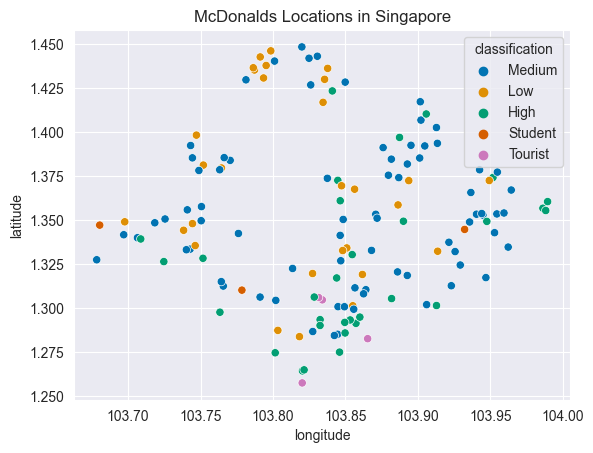

In [10]:
# do a scatter plot for latitude and longitude with color as classification
sns.scatterplot(data=mcd_df, x='longitude', y='latitude', hue='classification', palette='colorblind')
plt.title('McDonalds Locations in Singapore')
plt.show()

- Most of the mcdonalds that are 'low' tend to be from the North.
- 'Medium' is the dominant classification
- 'High' is the most dominant near the central region of Singapore

## Feature Engineering

In [7]:
# set a list of distances in km
distance_list = [0.2,0.5,1,2]

### Hawker_count

In [8]:
# Get the num_hawker feature data
for i in distance_list:
    print(f'This is the run for distance {i}km')
    
    # this function initiates the dataframe based on the length of mcd_df and then computes the number of X within the distance
    # the columns of the item to be counted must be 'latitude' and 'longitude'
    result = Distance_Data(mcd_df).num_count(i,mcd_df,hawker_df,'hawker_count')

    # save the data to csv
    result.to_csv(f'hawker_{i}.csv', index=False)
    print(f'Successfully finished for distance {i}km')

This is the run for distance 0.2km
Empty matrix initialized with shape (144, 1)
Successfully finished for distance 0.2km
This is the run for distance 0.5km
Empty matrix initialized with shape (144, 1)
Successfully finished for distance 0.5km
This is the run for distance 1km
Empty matrix initialized with shape (144, 1)
Successfully finished for distance 1km
This is the run for distance 2km
Empty matrix initialized with shape (144, 1)
Successfully finished for distance 2km


### Hdb_count

In [10]:
# Get the num_hdb feature data
for i in distance_list:
    print(f'This is the run for distance {i}km')
    
    # this function initiates the dataframe based on the length of mcd_df and then computes the number of X within the distance
    # the columns of the item to be counted must be 'latitude' and 'longitude'
    result = Distance_Data(mcd_df).num_count(i,mcd_df,hdb_df,'hdb_count')

    # save the data to csv
    result.to_csv(f'hdb_{i}.csv', index=False)
    print(f'Successfully finished for distance {i}km')

This is the run for distance 0.2km
Empty matrix initialized with shape (144, 1)
Successfully finished for distance 0.2km
This is the run for distance 0.5km
Empty matrix initialized with shape (144, 1)
Successfully finished for distance 0.5km
This is the run for distance 1km
Empty matrix initialized with shape (144, 1)
Successfully finished for distance 1km
This is the run for distance 2km
Empty matrix initialized with shape (144, 1)
Successfully finished for distance 2km


### Bus stop count and traffic

In [8]:
# merge stops and traffic
stops_traffic_df = pd.merge(traffic_df, stops_df, right_on='BusStopCode', left_on='PT_CODE',how='left')

In [9]:
stops_traffic_df[stops_traffic_df['Latitude'].isnull()]['PT_CODE'].value_counts()

98231    121
40189    121
98059    120
98051    120
98031    119
98039    116
98239    112
Name: PT_CODE, dtype: int64

In [10]:
# manually impute PT_CODE 98231 with latitude and longitude numbers
# https://businterchange.net/sgbus/stops/busstop.php?stop=98231
stops_traffic_df.loc[stops_traffic_df['PT_CODE']=='98231','Latitude']=1.3712054765689932 
stops_traffic_df.loc[stops_traffic_df['PT_CODE']=='98231','Longitude']=103.97183863961368

# https://businterchange.net/sgbus/stops/busstop.php?stop=98239
stops_traffic_df.loc[stops_traffic_df['PT_CODE']=='98239','Latitude']=1.3715083131923107 
stops_traffic_df.loc[stops_traffic_df['PT_CODE']=='98239','Longitude']=103.97261543551689

# https://businterchange.net/sgbus/stops/busstop.php?stop=40189
stops_traffic_df.loc[stops_traffic_df['PT_CODE']=='40189','Latitude']=1.312394537329837  
stops_traffic_df.loc[stops_traffic_df['PT_CODE']=='40189','Longitude']=103.83917866460602

# https://businterchange.net/sgbus/stops/busstop.php?stop=98059
stops_traffic_df.loc[stops_traffic_df['PT_CODE']=='98059','Latitude']=1.3733394338087794  
stops_traffic_df.loc[stops_traffic_df['PT_CODE']=='98059','Longitude']=103.9746197614457

# https://businterchange.net/sgbus/stops/busstop.php?stop=98051
stops_traffic_df.loc[stops_traffic_df['PT_CODE']=='98051','Latitude']=1.3731678217387
stops_traffic_df.loc[stops_traffic_df['PT_CODE']=='98051','Longitude']=103.9746734056245

# https://businterchange.net/sgbus/stops/busstop.php?stop=98031
stops_traffic_df.loc[stops_traffic_df['PT_CODE']=='98031','Latitude']=1.3802596577286035 
stops_traffic_df.loc[stops_traffic_df['PT_CODE']=='98031','Longitude']=103.94264233700554

# https://businterchange.net/sgbus/stops/busstop.php?stop=98039
stops_traffic_df.loc[stops_traffic_df['PT_CODE']=='98039','Latitude']=1.367588514611644
stops_traffic_df.loc[stops_traffic_df['PT_CODE']=='98039','Longitude']=103.96888269398227

In [11]:
stops_traffic_df[stops_traffic_df['Latitude'].isnull()]['PT_CODE'].value_counts()

Series([], Name: PT_CODE, dtype: int64)

In [11]:
# rename column to latitude and longitude
stops_traffic_df.rename(columns={'Latitude':'latitude','Longitude':'longitude'}, inplace=True)
stops_traffic_df.rename(columns={'TOTAL_TAP_IN_VOLUME':'in','TOTAL_TAP_OUT_VOLUME':'out'}, inplace=True)

# replace / in DAY_TYPE column with _
stops_traffic_df['DAY_TYPE'] = stops_traffic_df['DAY_TYPE'].str.replace('/','_')

In [60]:
# how much data do we have of stops?
stops_traffic_df.TIME_PER_HOUR.value_counts()

8     30116
7     30065
12    30064
13    30016
17    30005
9     29999
18    29991
14    29989
11    29983
15    29941
19    29928
16    29921
10    29915
20    29673
6     29554
21    28982
22    28703
23    28067
0     23820
5     20304
1      9701
2      1030
3       333
4       232
Name: TIME_PER_HOUR, dtype: int64

In [70]:
# how much data do we have of stops?
stops_traffic_df.DAY_TYPE.value_counts()

WEEKDAY             296138
WEEKENDS_HOLIDAY    294194
Name: DAY_TYPE, dtype: int64

In [38]:
# We want to investigate if the timing of the traffic has an impact on food prices
# we will try eating hours, working hours, and total
time = [[7,8,9,12,13,14,18,19,20],[7,8,9,10,11,12,13,14,15,16,17,18,19],list(np.arange(24))]

# Get the foot_traffic feature data for number of stops by distance, number of in_traffic by distance by time by weekday/weekend, number of out_traffic by distance by time by weekday/weekend
for i in distance_list:
    for k in ['WEEKDAY','WEEKENDS_HOLIDAY']:
        for l in time:
            print(f'This is the run for distance {i}km, {k}, time {l}')
            
            # this function initiates the dataframe based on the length of mcd_df and then computes the number of X within the distance
            # the columns of the item to be counted must be 'latitude' and 'longitude'
            traffic_in, traffic_out = Distance_Data(mcd_df).traffic_count(i, mcd_df, stops_traffic_df, k,l)

            if l == [7,8,9,10,11,12,13,14,15,16,17,18,19]:
                timing = 'working'
            elif l == [7,8,9,12,13,14,18,19,20]:
                timing = 'eating'
            else:
                timing = 'total'

            # save the data to csv
            traffic_in.to_csv(f'in_{k}_{timing}_{i}.csv', index=False)
            traffic_out.to_csv(f'out_{k}_{timing}_{i}.csv', index=False)
            print(f'Successfully finished for distance {i}km, {k}, {timing}')

This is the run for distance 0.2km, WEEKDAY, time [7, 8, 9, 12, 13, 14, 18, 19, 20]
Successfully finished for distance 0.2km, WEEKDAY, eating
This is the run for distance 0.2km, WEEKDAY, time [7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]
Successfully finished for distance 0.2km, WEEKDAY, working
This is the run for distance 0.2km, WEEKDAY, time [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]
Successfully finished for distance 0.2km, WEEKDAY, total
This is the run for distance 0.2km, WEEKENDS_HOLIDAY, time [7, 8, 9, 12, 13, 14, 18, 19, 20]
Successfully finished for distance 0.2km, WEEKENDS_HOLIDAY, eating
This is the run for distance 0.2km, WEEKENDS_HOLIDAY, time [7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]
Successfully finished for distance 0.2km, WEEKENDS_HOLIDAY, working
This is the run for distance 0.2km, WEEKENDS_HOLIDAY, time [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]
Successfully finished 

## EDA Continued

In [6]:
mcd_df.groupby(['classification'])['density'].mean()

classification
High       8117.08
Low       14114.16
Medium    13420.00
Student    5826.90
Tourist     399.55
Name: density, dtype: float64

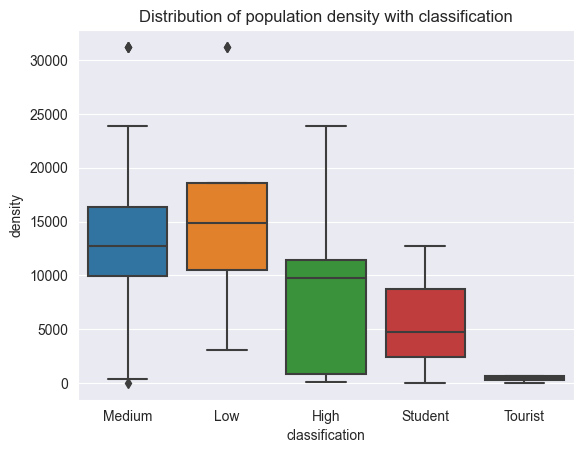

In [10]:
# set the title
plt.title('Distribution of population density with classification')

# set the x-axis label
plt.xlabel('Classification')

# set the y-axis label
plt.ylabel('Density')

# plot the violin plot
sns.boxplot(x='classification', y='density', data=mcd_df)

# show the plot
plt.show()


In [7]:
# concatenate all the dataframes
mcd_df = pd.concat([mcd_df,\
                    hawker_02,hawker_05,hawker_1,hawker_2,\
                        hdb_02,hdb_05,hdb_1,hdb_2,\
                            in_weekday_working_02,in_weekday_working_05,in_weekday_working_1,in_weekday_working_2,\
                                in_weekday_eating_02,in_weekday_eating_05,in_weekday_eating_1,in_weekday_eating_2,\
                                    in_weekday_total_02,in_weekday_total_05,in_weekday_total_1,in_weekday_total_2,\
                                        in_weekends_holiday_working_02,in_weekends_holiday_working_05,in_weekends_holiday_working_1,in_weekends_holiday_working_2,\
                                            in_weekends_holiday_eating_02,in_weekends_holiday_eating_05,in_weekends_holiday_eating_1,in_weekends_holiday_eating_2,\
                                                in_weekends_holiday_total_02,in_weekends_holiday_total_05,in_weekends_holiday_total_1,in_weekends_holiday_total_2,\
                                                    out_weekday_working_02,out_weekday_working_05,out_weekday_working_1,out_weekday_working_2,\
                                                        out_weekday_eating_02,out_weekday_eating_05,out_weekday_eating_1,out_weekday_eating_2,\
                                                            out_weekday_total_02,out_weekday_total_05,out_weekday_total_1,out_weekday_total_2,\
                                                                out_weekends_holiday_working_02,out_weekends_holiday_working_05,out_weekends_holiday_working_1,out_weekends_holiday_working_2,\
                                                                    out_weekends_holiday_eating_02,out_weekends_holiday_eating_05,out_weekends_holiday_eating_1,out_weekends_holiday_eating_2,\
                                                                        out_weekends_holiday_total_02,out_weekends_holiday_total_05,out_weekends_holiday_total_1,out_weekends_holiday_total_2\
                            ], axis=1)

In [8]:
# fill 0 with 1 for population
mcd_df['population'] = mcd_df['population'].replace(0,1)

In [9]:
mcd_df['in_WEEKDAY_working_02_pop'] = mcd_df['in_WEEKDAY_working_0.2'] / mcd_df['population']
mcd_df['in_WEEKDAY_working_05_pop'] = mcd_df['in_WEEKDAY_working_0.5'] / mcd_df['population']
mcd_df['in_WEEKDAY_working_1_pop'] = mcd_df['in_WEEKDAY_working_1'] / mcd_df['population']
mcd_df['in_WEEKDAY_working_2_pop'] = mcd_df['in_WEEKDAY_working_2'] / mcd_df['population']

mcd_df['in_WEEKDAY_eating_02_pop'] = mcd_df['in_WEEKDAY_eating_0.2'] / mcd_df['population']
mcd_df['in_WEEKDAY_eating_05_pop'] = mcd_df['in_WEEKDAY_eating_0.5'] / mcd_df['population']
mcd_df['in_WEEKDAY_eating_1_pop'] = mcd_df['in_WEEKDAY_eating_1'] / mcd_df['population']
mcd_df['in_WEEKDAY_eating_2_pop'] = mcd_df['in_WEEKDAY_eating_2'] / mcd_df['population']

mcd_df['in_WEEKDAY_total_02_pop'] = mcd_df['in_WEEKDAY_total_0.2'] / mcd_df['population']
mcd_df['in_WEEKDAY_total_05_pop'] = mcd_df['in_WEEKDAY_total_0.5'] / mcd_df['population']
mcd_df['in_WEEKDAY_total_1_pop'] = mcd_df['in_WEEKDAY_total_1'] / mcd_df['population']
mcd_df['in_WEEKDAY_total_2_pop'] = mcd_df['in_WEEKDAY_total_2'] / mcd_df['population']

mcd_df['in_WEEKENDS_HOLIDAY_working_02_pop'] = mcd_df['in_WEEKENDS_HOLIDAY_working_0.2'] / mcd_df['population']
mcd_df['in_WEEKENDS_HOLIDAY_working_05_pop'] = mcd_df['in_WEEKENDS_HOLIDAY_working_0.5'] / mcd_df['population']
mcd_df['in_WEEKENDS_HOLIDAY_working_1_pop'] = mcd_df['in_WEEKENDS_HOLIDAY_working_1'] / mcd_df['population']
mcd_df['in_WEEKENDS_HOLIDAY_working_2_pop'] = mcd_df['in_WEEKENDS_HOLIDAY_working_2'] / mcd_df['population']

mcd_df['in_WEEKENDS_HOLIDAY_eating_02_pop'] = mcd_df['in_WEEKENDS_HOLIDAY_eating_0.2'] / mcd_df['population']
mcd_df['in_WEEKENDS_HOLIDAY_eating_05_pop'] = mcd_df['in_WEEKENDS_HOLIDAY_eating_0.5'] / mcd_df['population']
mcd_df['in_WEEKENDS_HOLIDAY_eating_1_pop'] = mcd_df['in_WEEKENDS_HOLIDAY_eating_1'] / mcd_df['population']
mcd_df['in_WEEKENDS_HOLIDAY_eating_2_pop'] = mcd_df['in_WEEKENDS_HOLIDAY_eating_2'] / mcd_df['population']

mcd_df['in_WEEKENDS_HOLIDAY_total_02_pop'] = mcd_df['in_WEEKENDS_HOLIDAY_total_0.2'] / mcd_df['population']
mcd_df['in_WEEKENDS_HOLIDAY_total_05_pop'] = mcd_df['in_WEEKENDS_HOLIDAY_total_0.5'] / mcd_df['population']
mcd_df['in_WEEKENDS_HOLIDAY_total_1_pop'] = mcd_df['in_WEEKENDS_HOLIDAY_total_1'] / mcd_df['population']
mcd_df['in_WEEKENDS_HOLIDAY_total_2_pop'] = mcd_df['in_WEEKENDS_HOLIDAY_total_2'] / mcd_df['population']

mcd_df['out_WEEKDAY_working_02_pop'] = mcd_df['out_WEEKDAY_working_0.2'] / mcd_df['population']
mcd_df['out_WEEKDAY_working_05_pop'] = mcd_df['out_WEEKDAY_working_0.5'] / mcd_df['population']
mcd_df['out_WEEKDAY_working_1_pop'] = mcd_df['out_WEEKDAY_working_1'] / mcd_df['population']
mcd_df['out_WEEKDAY_working_2_pop'] = mcd_df['out_WEEKDAY_working_2'] / mcd_df['population']

mcd_df['out_WEEKDAY_eating_02_pop'] = mcd_df['out_WEEKDAY_eating_0.2'] / mcd_df['population']
mcd_df['out_WEEKDAY_eating_05_pop'] = mcd_df['out_WEEKDAY_eating_0.5'] / mcd_df['population']
mcd_df['out_WEEKDAY_eating_1_pop'] = mcd_df['out_WEEKDAY_eating_1'] / mcd_df['population']
mcd_df['out_WEEKDAY_eating_2_pop'] = mcd_df['out_WEEKDAY_eating_2'] / mcd_df['population']

mcd_df['out_WEEKDAY_total_02_pop'] = mcd_df['out_WEEKDAY_total_0.2'] / mcd_df['population']
mcd_df['out_WEEKDAY_total_05_pop'] = mcd_df['out_WEEKDAY_total_0.5'] / mcd_df['population']
mcd_df['out_WEEKDAY_total_1_pop'] = mcd_df['out_WEEKDAY_total_1'] / mcd_df['population']
mcd_df['out_WEEKDAY_total_2_pop'] = mcd_df['out_WEEKDAY_total_2'] / mcd_df['population']

mcd_df['out_WEEKENDS_HOLIDAY_working_02_pop'] = mcd_df['out_WEEKENDS_HOLIDAY_working_0.2'] / mcd_df['population']
mcd_df['out_WEEKENDS_HOLIDAY_working_05_pop'] = mcd_df['out_WEEKENDS_HOLIDAY_working_0.5'] / mcd_df['population']
mcd_df['out_WEEKENDS_HOLIDAY_working_1_pop'] = mcd_df['out_WEEKENDS_HOLIDAY_working_1'] / mcd_df['population']
mcd_df['out_WEEKENDS_HOLIDAY_working_2_pop'] = mcd_df['out_WEEKENDS_HOLIDAY_working_2'] / mcd_df['population']

mcd_df['out_WEEKENDS_HOLIDAY_eating_02_pop'] = mcd_df['out_WEEKENDS_HOLIDAY_eating_0.2'] / mcd_df['population']
mcd_df['out_WEEKENDS_HOLIDAY_eating_05_pop'] = mcd_df['out_WEEKENDS_HOLIDAY_eating_0.5'] / mcd_df['population']
mcd_df['out_WEEKENDS_HOLIDAY_eating_1_pop'] = mcd_df['out_WEEKENDS_HOLIDAY_eating_1'] / mcd_df['population']
mcd_df['out_WEEKENDS_HOLIDAY_eating_2_pop'] = mcd_df['out_WEEKENDS_HOLIDAY_eating_2'] / mcd_df['population']

mcd_df['out_WEEKENDS_HOLIDAY_total_02_pop'] = mcd_df['out_WEEKENDS_HOLIDAY_total_0.2'] / mcd_df['population']
mcd_df['out_WEEKENDS_HOLIDAY_total_05_pop'] = mcd_df['out_WEEKENDS_HOLIDAY_total_0.5'] / mcd_df['population']
mcd_df['out_WEEKENDS_HOLIDAY_total_1_pop'] = mcd_df['out_WEEKENDS_HOLIDAY_total_1'] / mcd_df['population']
mcd_df['out_WEEKENDS_HOLIDAY_total_2_pop'] = mcd_df['out_WEEKENDS_HOLIDAY_total_2'] / mcd_df['population']

/var/folders/nv/vxq64h_j3ydccspj69p0_4_c0000gn/T/ipykernel_34669/2473228411.py:49: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  mcd_df['out_WEEKENDS_HOLIDAY_working_2_pop'] = mcd_df['out_WEEKENDS_HOLIDAY_working_2'] / mcd_df['population']
/var/folders/nv/vxq64h_j3ydccspj69p0_4_c0000gn/T/ipykernel_34669/2473228411.py:51: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  mcd_df['out_WEEKENDS_HOLIDAY_eating_02_pop'] = mcd_df['out_WEEKENDS_HOLIDAY_eating_0.2'] / mcd_df['population']
/var/folders/nv/vxq64h_j3ydccspj69p0_4_c0000gn/T/ipyk

In [10]:
mcd_df.fillna(0, inplace=True)

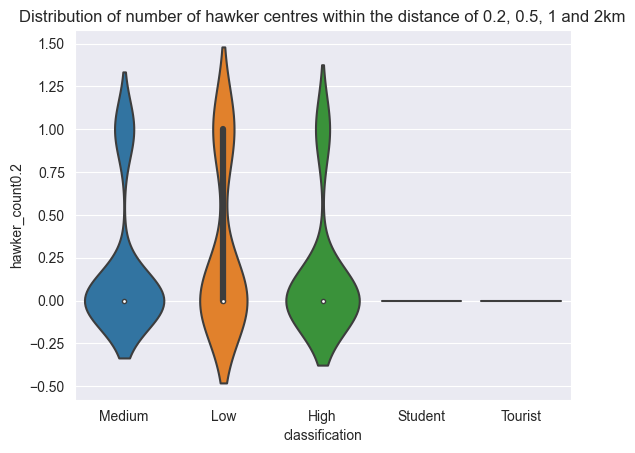

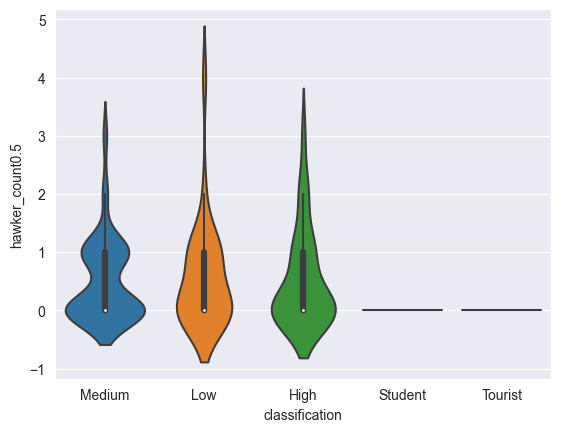

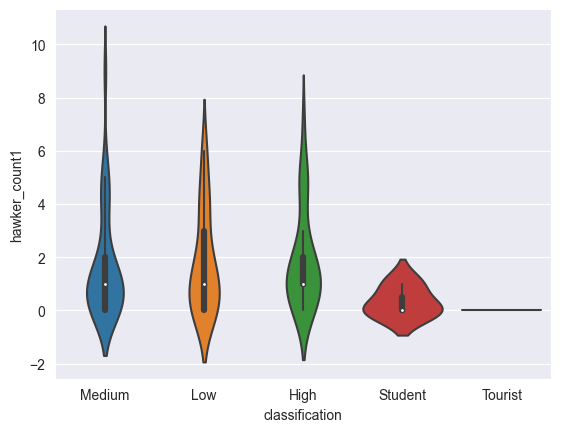

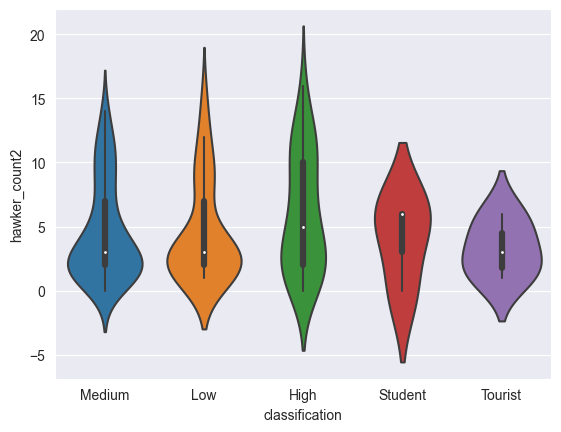

In [26]:
# do a violin plot of classification against hawker_count0.2, hawker_count0.5, hawkers_count1, hawker_count2
# to see if there is a difference in the distribution of the number of hawker centres within the distance
# of 0.2, 0.5, 1 and 2km

# set the title
plt.title('Distribution of number of hawker centres within the distance of 0.2, 0.5, 1 and 2km')

# set the x-axis label
plt.xlabel('Classification')

# set the y-axis label
plt.ylabel('Number of hawker centres')

# plot the violin plot
sns.violinplot(x='classification', y='hawker_count0.2', data=mcd_df)

# show the plot
plt.show()

sns.violinplot(x='classification', y='hawker_count0.5', data=mcd_df)

# show the plot
plt.show()

sns.violinplot(x='classification', y='hawker_count1', data=mcd_df)

# show the plot
plt.show()

sns.violinplot(x='classification', y='hawker_count2', data=mcd_df)

# show the plot
plt.show()

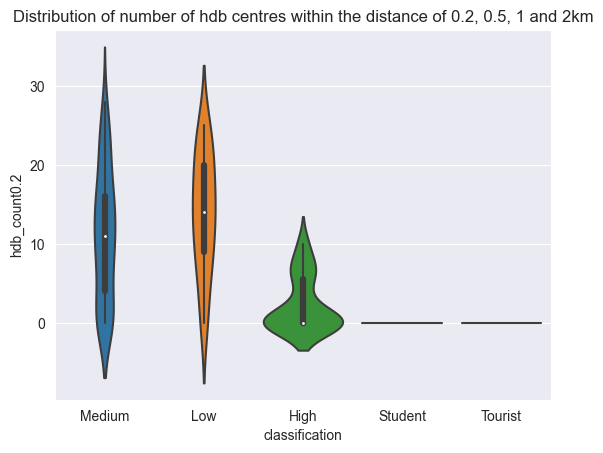

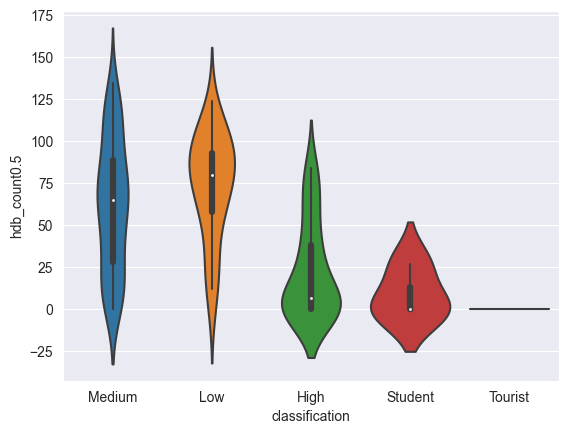

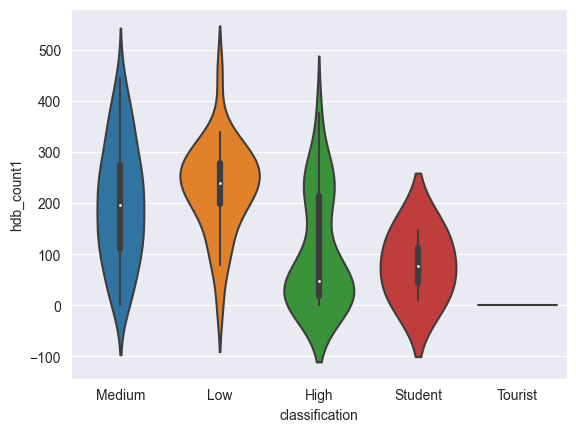

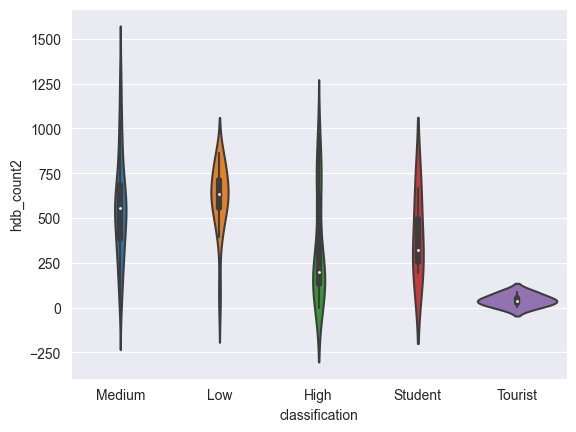

In [27]:
# do a violin plot of classification against hawker_count0.2, hawker_count0.5, hawkers_count1, hawker_count2
# to see if there is a difference in the distribution of the number of hawker centres within the distance
# of 0.2, 0.5, 1 and 2km

# set the title
plt.title('Distribution of number of hdb centres within the distance of 0.2, 0.5, 1 and 2km')

# set the x-axis label
plt.xlabel('Classification')

# set the y-axis label
plt.ylabel('Number of hawker centres')

# plot the violin plot
sns.violinplot(x='classification', y='hdb_count0.2', data=mcd_df)

# show the plot
plt.show()

sns.violinplot(x='classification', y='hdb_count0.5', data=mcd_df)

# show the plot
plt.show()

sns.violinplot(x='classification', y='hdb_count1', data=mcd_df)

# show the plot
plt.show()

sns.violinplot(x='classification', y='hdb_count2', data=mcd_df)

# show the plot
plt.show()

Seems like we can potentially use hdb_count to differentiate between low and high valued McDonalds from the violin plots. Unfortunately, hawker centre counts didn't give us much insight

In [14]:
from scipy.stats import chi2_contingency

corr_matrix = pd.DataFrame(columns=mcd_df.columns[1:], index=mcd_df.columns[1:])

# loop through each pair of predictor variables and calculate the chi-squared test of independence
for i in range(1, len(mcd_df.columns)):
    for j in range(i+1, len(mcd_df.columns)):
        contingency_table = pd.crosstab(mcd_df.iloc[:,i], mcd_df.iloc[:,j])
        chi2, p, dof, expected = chi2_contingency(contingency_table)
        corr_matrix.iloc[i-1, j-1] = chi2
        corr_matrix.iloc[j-1, i-1] = chi2

# print the correlation matrix
print(corr_matrix)

                                address latitude longitude classification  \
address                             NaN 20592.00  20592.00         576.00   
latitude                       20592.00      NaN  20592.00         576.00   
longitude                      20592.00 20592.00       NaN         576.00   
classification                   576.00   576.00    576.00            NaN   
planning_area                   5328.00  5328.00   5328.00         272.85   
...                                 ...      ...       ...            ...   
out_WEEKENDS_HOLIDAY_eating_2  20592.00 20592.00  20592.00         576.00   
out_WEEKENDS_HOLIDAY_total_0.2 19872.00 19872.00  19872.00         497.47   
out_WEEKENDS_HOLIDAY_total_0.5 20304.00 20304.00  20304.00         576.00   
out_WEEKENDS_HOLIDAY_total_1   20448.00 20448.00  20448.00         576.00   
out_WEEKENDS_HOLIDAY_total_2   20592.00 20592.00  20592.00         576.00   

                               planning_area region region_type property_ty

In [23]:
corr_matrix['classification'].sort_values(ascending=False).head(40)

in_WEEKENDS_HOLIDAY_working_2      576.00
in_WEEKENDS_HOLIDAY_eating_2       576.00
in_WEEKENDS_HOLIDAY_total_1        576.00
in_WEEKENDS_HOLIDAY_total_2        576.00
in_WEEKDAY_total_2                 576.00
in_WEEKENDS_HOLIDAY_working_1      576.00
latitude                           576.00
in_WEEKENDS_HOLIDAY_eating_0.5     576.00
in_WEEKENDS_HOLIDAY_eating_1       576.00
in_WEEKENDS_HOLIDAY_total_0.5      576.00
out_WEEKDAY_working_0.5            576.00
out_WEEKDAY_working_1              576.00
out_WEEKDAY_working_2              576.00
out_WEEKDAY_eating_0.5             576.00
out_WEEKDAY_eating_1               576.00
out_WEEKDAY_eating_2               576.00
out_WEEKDAY_total_0.5              576.00
out_WEEKDAY_total_1                576.00
out_WEEKDAY_total_2                576.00
out_WEEKENDS_HOLIDAY_working_0.5   576.00
out_WEEKENDS_HOLIDAY_working_1     576.00
out_WEEKENDS_HOLIDAY_working_2     576.00
out_WEEKENDS_HOLIDAY_eating_0.5    576.00
out_WEEKENDS_HOLIDAY_eating_1     

In [25]:
mcd_df.columns

Index(['title', 'address', 'latitude', 'longitude', 'classification',
       'planning_area', 'region', 'region_type', 'property_type', 'population',
       'size', 'density', 'hawker_count0.2', 'hawker_count0.5',
       'hawker_count1', 'hawker_count2', 'hdb_count0.2', 'hdb_count0.5',
       'hdb_count1', 'hdb_count2', 'in_WEEKDAY_working_0.2',
       'in_WEEKDAY_working_0.5', 'in_WEEKDAY_working_1',
       'in_WEEKDAY_working_2', 'in_WEEKDAY_eating_0.2',
       'in_WEEKDAY_eating_0.5', 'in_WEEKDAY_eating_1', 'in_WEEKDAY_eating_2',
       'in_WEEKDAY_total_0.2', 'in_WEEKDAY_total_0.5', 'in_WEEKDAY_total_1',
       'in_WEEKDAY_total_2', 'in_WEEKENDS_HOLIDAY_working_0.2',
       'in_WEEKENDS_HOLIDAY_working_0.5', 'in_WEEKENDS_HOLIDAY_working_1',
       'in_WEEKENDS_HOLIDAY_working_2', 'in_WEEKENDS_HOLIDAY_eating_0.2',
       'in_WEEKENDS_HOLIDAY_eating_0.5', 'in_WEEKENDS_HOLIDAY_eating_1',
       'in_WEEKENDS_HOLIDAY_eating_2', 'in_WEEKENDS_HOLIDAY_total_0.2',
       'in_WEEKENDS_HOLIDA

In [11]:
mcd_df_copy = mcd_df.copy()
mcd_df_copy.drop(['population','size','region','region_type','property_type','title', 'address', 'latitude', 'longitude','planning_area'], axis=1, inplace=True)

In [19]:
# drop classification that are Student or Tourist
mcd_df_copy = mcd_df_copy[mcd_df_copy['classification'] != 'Student']
mcd_df_copy = mcd_df_copy[mcd_df_copy['classification'] != 'Tourist']
mcd_df_copy = mcd_df_copy[mcd_df_copy['classification'] != 'High']

In [20]:
# import train test split
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
import numpy as np

# train a decision tree classifier
X = mcd_df_copy.drop('classification', axis=1)

# create dummies for 'Planning Area'
# X = pd.get_dummies(X, columns=['Region Type'], drop_first=True)
# convert X.columns to a list
X.col = list(X.columns)

y = mcd_df_copy['classification']

# split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

/var/folders/nv/vxq64h_j3ydccspj69p0_4_c0000gn/T/ipykernel_34669/1772156790.py:14: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  X.col = list(X.columns)


In [78]:
X.describe()

,density,hawker_count0.2,hawker_count0.5,hawker_count1,hawker_count2,hdb_count0.2,hdb_count0.5,hdb_count1,hdb_count2,in_WEEKDAY_working_0.2,in_WEEKDAY_working_0.5,in_WEEKDAY_working_1,in_WEEKDAY_working_2,in_WEEKDAY_eating_0.2,in_WEEKDAY_eating_0.5,in_WEEKDAY_eating_1,in_WEEKDAY_eating_2,in_WEEKDAY_total_0.2,in_WEEKDAY_total_0.5,in_WEEKDAY_total_1,in_WEEKDAY_total_2,in_WEEKENDS_HOLIDAY_working_0.2,in_WEEKENDS_HOLIDAY_working_0.5,in_WEEKENDS_HOLIDAY_working_1,in_WEEKENDS_HOLIDAY_working_2,in_WEEKENDS_HOLIDAY_eating_0.2,in_WEEKENDS_HOLIDAY_eating_0.5,in_WEEKENDS_HOLIDAY_eating_1,in_WEEKENDS_HOLIDAY_eating_2,in_WEEKENDS_HOLIDAY_total_0.2,in_WEEKENDS_HOLIDAY_total_0.5,in_WEEKENDS_HOLIDAY_total_1,in_WEEKENDS_HOLIDAY_total_2,out_WEEKDAY_working_0.2,out_WEEKDAY_working_0.5,out_WEEKDAY_working_1,out_WEEKDAY_working_2,out_WEEKDAY_eating_0.2,out_WEEKDAY_eating_0.5,out_WEEKDAY_eating_1,out_WEEKDAY_eating_2,out_WEEKDAY_total_0.2,out_WEEKDAY_total_0.5,out_WEEKDAY_total_1,out_WEEKDAY_total_2,out_WEEKENDS_HOLIDAY_working_0.2,out_WEEKENDS_HOLIDAY_working_0.5,out_WEEKENDS_HOLIDAY_working_1,out_WEEKENDS_HOLIDAY_working_2,out_WEEKENDS_HOLIDAY_eating_0.2,out_WEEKENDS_HOLIDAY_eating_0.5,out_WEEKENDS_HOLIDAY_eating_1,out_WEEKENDS_HOLIDAY_eating_2,out_WEEKENDS_HOLIDAY_total_0.2,out_WEEKENDS_HOLIDAY_total_0.5,out_WEEKENDS_HOLIDAY_total_1,out_WEEKENDS_HOLIDAY_total_2,in_WEEKDAY_working_02_pop,in_WEEKDAY_working_05_pop,in_WEEKDAY_working_1_pop,in_WEEKDAY_working_2_pop,in_WEEKDAY_eating_02_pop,in_WEEKDAY_eating_05_pop,in_WEEKDAY_eating_1_pop,in_WEEKDAY_eating_2_pop,in_WEEKDAY_total_02_pop,in_WEEKDAY_total_05_pop,in_WEEKDAY_total_1_pop,in_WEEKDAY_total_2_pop,in_WEEKENDS_HOLIDAY_working_02_pop,in_WEEKENDS_HOLIDAY_working_05_pop,in_WEEKENDS_HOLIDAY_working_1_pop,in_WEEKENDS_HOLIDAY_working_2_pop,in_WEEKENDS_HOLIDAY_eating_02_pop,in_WEEKENDS_HOLIDAY_eating_05_pop,in_WEEKENDS_HOLIDAY_eating_1_pop,in_WEEKENDS_HOLIDAY_eating_2_pop,in_WEEKENDS_HOLIDAY_total_02_pop,in_WEEKENDS_HOLIDAY_total_05_pop,in_WEEKENDS_HOLIDAY_total_1_pop,in_WEEKENDS_HOLIDAY_total_2_pop,out_WEEKDAY_working_02_pop,out_WEEKDAY_working_05_pop,out_WEEKDAY_working_1_pop,out_WEEKDAY_working_2_pop,out_WEEKDAY_eating_02_pop,out_WEEKDAY_eating_05_pop,out_WEEKDAY_eating_1_pop,out_WEEKDAY_eating_2_pop,out_WEEKDAY_total_02_pop,out_WEEKDAY_total_05_pop,out_WEEKDAY_total_1_pop,out_WEEKDAY_total_2_pop,out_WEEKENDS_HOLIDAY_working_02_pop,out_WEEKENDS_HOLIDAY_working_05_pop,out_WEEKENDS_HOLIDAY_working_1_pop,out_WEEKENDS_HOLIDAY_working_2_pop,out_WEEKENDS_HOLIDAY_eating_02_pop,out_WEEKENDS_HOLIDAY_eating_05_pop,out_WEEKENDS_HOLIDAY_eating_1_pop,out_WEEKENDS_HOLIDAY_eating_2_pop,out_WEEKENDS_HOLIDAY_total_02_pop,out_WEEKENDS_HOLIDAY_total_05_pop,out_WEEKENDS_HOLIDAY_total_1_pop,out_WEEKENDS_HOLIDAY_total_2_pop
count,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00
mean,12367.01,0.21,0.52,1.74,4.85,9.72,55.61,184.52,519.83,276796.82,689156.42,1884241.57,5249632.28,198419.07,489924.47,1326323.66,3668337.76,356037.82,872957.82,2352559.16,6512890.01,108761.01,268693.69,739776.96,2044941.69,73345.51,178546.89,485137.60,1335847.62,142167.44,343517.66,924864.20,2537786.05,288224.53,716090.12,1917963.50,5308944.93,195733.30,494390.62,1342227.02,3751462.45,341449.76,860707.31,2336464.74,6486737.20,117888.43,285359.32,752411.58,2048541.24,7409

### Evaluate best metrics for High Medium Low

In [14]:
# Implement a random forest
# create a dictionary of all values we want to test for random forest
param_grid = {'n_estimators': [100, 300, 500], 'criterion': ['gini', 'entropy'], 'max_depth': np.arange(3, 5), 'min_samples_split': np.arange(2, 5), 'min_samples_leaf': np.arange(2, 5), 'max_features': [None,'log2','sqrt']}

# random forest model
rfc = RandomForestClassifier()

# use gridsearch to test all values for random fo`rest
rfc_gscv = GridSearchCV(rfc, param_grid, cv=5)

# fit model to data
rfc_gscv.fit(X_train, y_train)

# predict the test data
predictions = rfc_gscv.predict(X_test)

# print the best parameters
print(rfc_gscv.best_params_)
print(f'{rfc_gscv.best_score_}')
print(rfc_gscv.best_estimator_)
print(rfc_gscv.best_index_)

{'criterion': 'entropy', 'max_depth': 4, 'max_features': None, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 300}
0.651082251082251
RandomForestClassifier(criterion='entropy', max_depth=4, max_features=None,
                       min_samples_leaf=4, n_estimators=300)
262


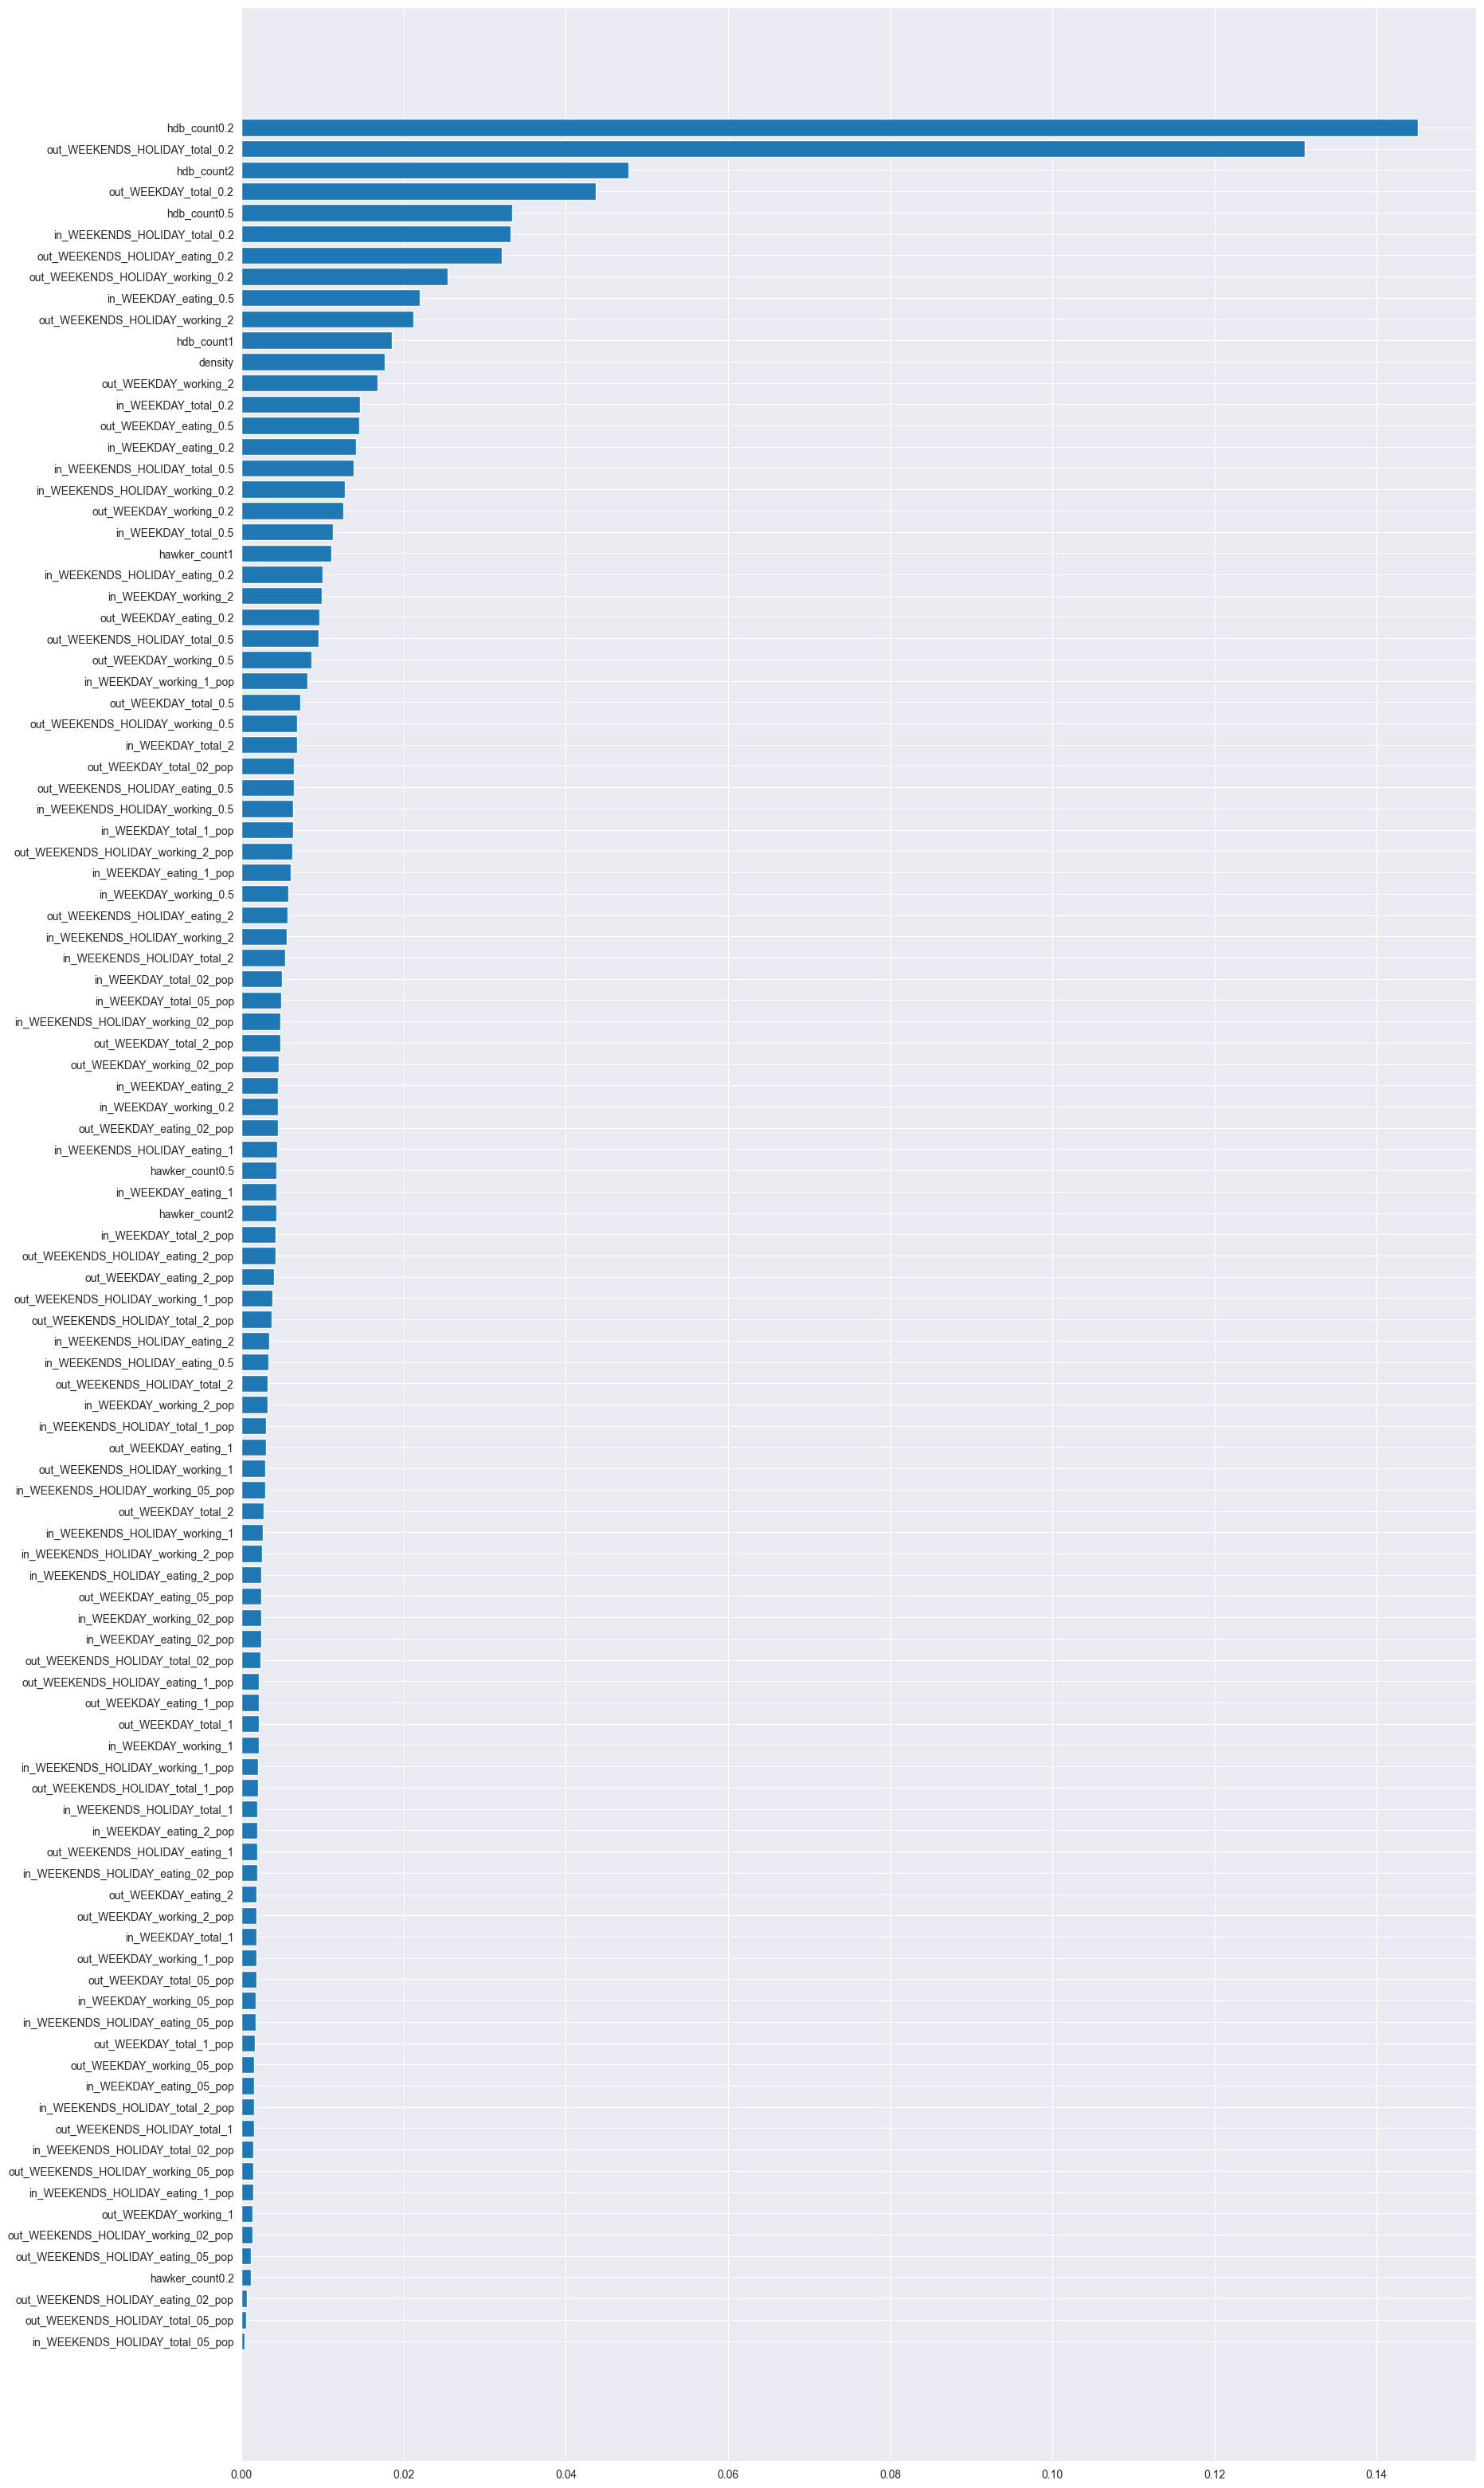

In [17]:
# change fig size to fit all the axis labels
plt.figure(figsize=(20,40))
best = rfc_gscv.best_estimator_
f_i = list(zip(X.col,best.feature_importances_))
f_i.sort(key = lambda x : x[1])
plt.barh([x[0] for x in f_i],[x[1] for x in f_i])

plt.show()

[[ 4  0  4]
 [ 1  1  4]
 [ 1  0 13]]


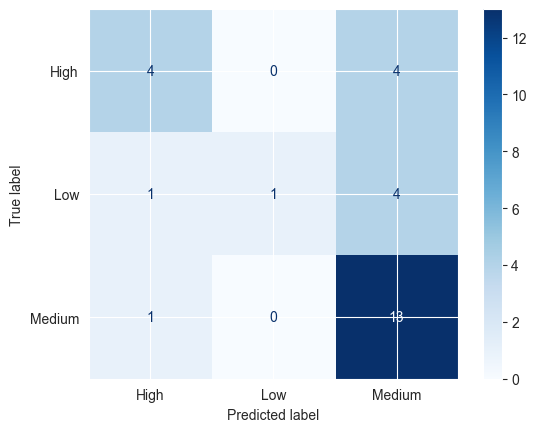

In [18]:
from sklearn.metrics import ConfusionMatrixDisplay
# Plot non-normalized confusion matrix
titles_options = [
    ("Confusion matrix, without normalization", None)
]

disp = ConfusionMatrixDisplay.from_estimator(
    rfc_gscv.best_estimator_,
    X_test,
    y_test,
    display_labels=['High','Low','Medium'],
    cmap=plt.cm.Blues,
)

print(disp.confusion_matrix)

plt.show()

### Evaluate best metrics for Medium vs Low

In [21]:
# Implement a random forest
# create a dictionary of all values we want to test for random forest
param_grid = {'n_estimators': [100, 300, 500], 'criterion': ['gini', 'entropy'], 'max_depth': np.arange(3, 5), 'min_samples_split': np.arange(2, 5), 'min_samples_leaf': np.arange(2, 5), 'max_features': [None,'log2','sqrt']}

# random forest model
rfc = RandomForestClassifier()

# use gridsearch to test all values for random forest
rfc_gscv = GridSearchCV(rfc, param_grid, cv=5)

# fit model to data
rfc_gscv.fit(X_train, y_train)

# predict the test data
predictions = rfc_gscv.predict(X_test)

# print the best parameters
print(rfc_gscv.best_params_)
print(f'{rfc_gscv.best_score_}')
print(rfc_gscv.best_estimator_)
print(rfc_gscv.best_index_)

{'criterion': 'gini', 'max_depth': 4, 'max_features': None, 'min_samples_leaf': 3, 'min_samples_split': 4, 'n_estimators': 100}
0.7507352941176471
RandomForestClassifier(max_depth=4, max_features=None, min_samples_leaf=3,
                       min_samples_split=4)
96


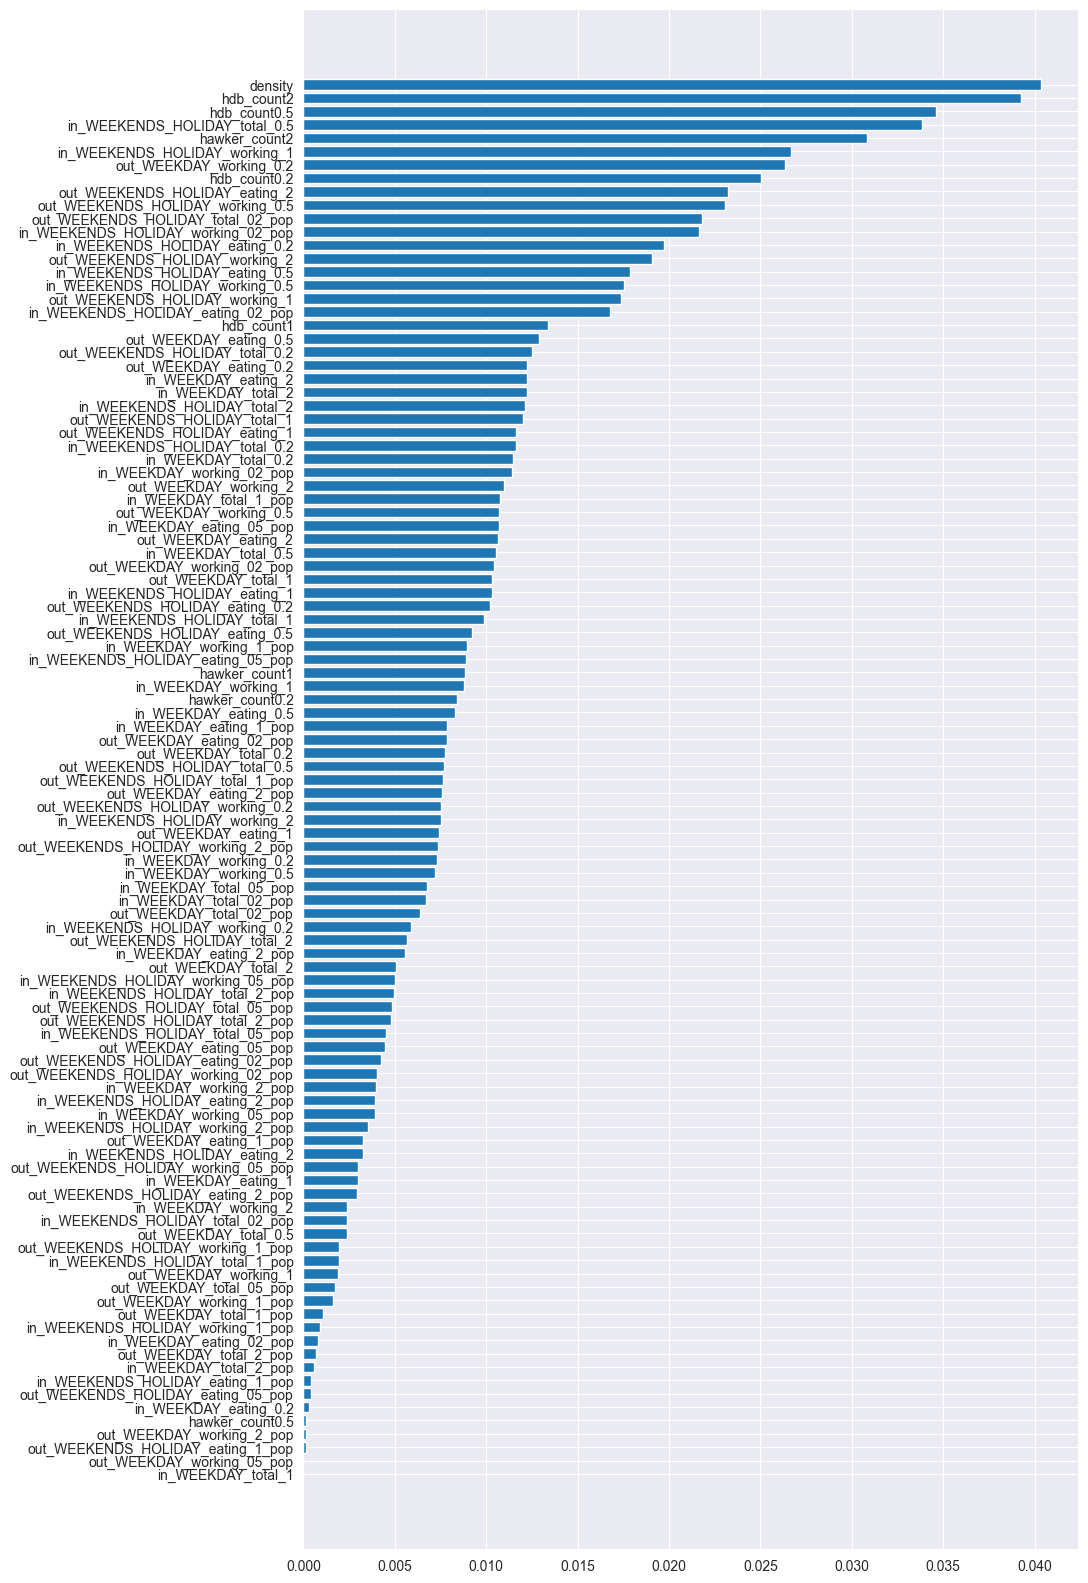

In [24]:
# change fig size to fit all the axis labels
plt.figure(figsize=(10,20))
best = rfc_gscv.best_estimator_
f_i = list(zip(X.col,best.feature_importances_))
f_i.sort(key = lambda x : x[1])
plt.barh([x[0] for x in f_i],[x[1] for x in f_i])

plt.show()

[[ 0  7]
 [ 0 15]]


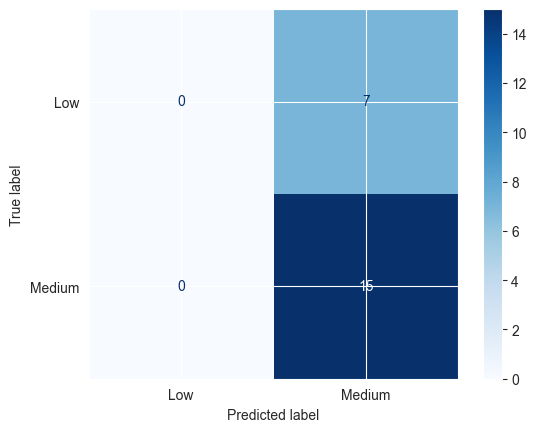

In [26]:
from sklearn.metrics import ConfusionMatrixDisplay
# Plot non-normalized confusion matrix
titles_options = [
    ("Confusion matrix, without normalization", None)
]

disp = ConfusionMatrixDisplay.from_estimator(
    rfc_gscv.best_estimator_,
    X_test,
    y_test,
    display_labels=['Low','Medium'],
    cmap=plt.cm.Blues,
)

print(disp.confusion_matrix)

plt.show()

### Try to log the results

In [20]:

# train a decision tree classifier
X = mcd_df_copy.drop('classification', axis=1)

# log transform including values with 0
X = X.apply(lambda x: np.log(x + 1e-8))

# create dummies for 'Planning Area'
# X = pd.get_dummies(X, columns=['Region Type'], drop_first=True)
# convert X.columns to a list
X.col = list(X.columns)

y = mcd_df_copy['classification']

# split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


/var/folders/nv/vxq64h_j3ydccspj69p0_4_c0000gn/T/ipykernel_32821/903497666.py:10: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  X.col = list(X.columns)


In [21]:
# Implement a random forest
# create a dictionary of all values we want to test for random forest
param_grid = {'n_estimators': [100, 300, 500], 'criterion': ['gini', 'entropy'], 'max_depth': np.arange(3, 5), 'min_samples_split': np.arange(2, 5), 'min_samples_leaf': np.arange(2, 5), 'max_features': [None,'log2','sqrt']}

# random forest model
rfc = RandomForestClassifier()

# use gridsearch to test all values for random forest
rfc_gscv = GridSearchCV(rfc, param_grid, cv=5)

# fit model to data
rfc_gscv.fit(X_train, y_train)

# predict the test data
predictions = rfc_gscv.predict(X_test)

# print the best parameters
print(rfc_gscv.best_params_)
print(f'{rfc_gscv.best_score_}')
print(rfc_gscv.best_estimator_)
print(rfc_gscv.best_index_)

{'criterion': 'entropy', 'max_depth': 4, 'max_features': 'log2', 'min_samples_leaf': 2, 'min_samples_split': 3, 'n_estimators': 100}
0.6606060606060605
RandomForestClassifier(criterion='entropy', max_depth=4, max_features='log2',
                       min_samples_leaf=2, min_samples_split=3)
273


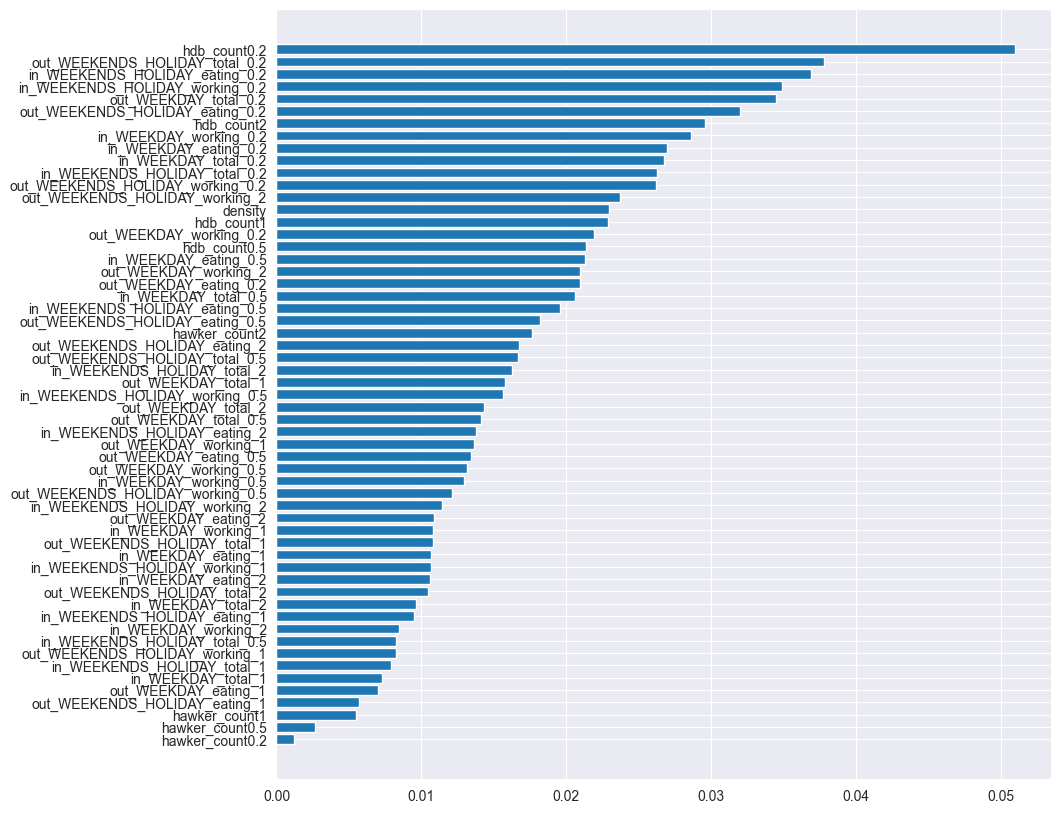

In [22]:
# change fig size to fit all the axis labels
plt.figure(figsize=(10,10))
best = rfc_gscv.best_estimator_
f_i = list(zip(X.col,best.feature_importances_))
f_i.sort(key = lambda x : x[1])
plt.barh([x[0] for x in f_i],[x[1] for x in f_i])

plt.show()

### Try feature selection

In [33]:
features =['classification', # target variable
           'out_WEEKENDS_HOLIDAY_eating_0.5','out_WEEKENDS_HOLIDAY_working_0.5','in_WEEKDAY_eating_0.2','hdb_count2' # medium vs low
           ,'hdb_count0.2','out_WEEKENDS_HOLIDAY_total_0.2' # high
            #  ,'density'
             ]

In [34]:
fs_df = mcd_df_copy[features]

In [35]:
# train a decision tree classifier
X = fs_df.drop('classification', axis=1)

# create dummies for 'Planning Area'
# X = pd.get_dummies(X, columns=['Region Type'], drop_first=True)
# convert X.columns to a list
X.col = list(X.columns)

y = fs_df['classification']

# split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


/var/folders/nv/vxq64h_j3ydccspj69p0_4_c0000gn/T/ipykernel_32821/149448396.py:7: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  X.col = list(X.columns)


In [36]:
# Implement a random forest
# create a dictionary of all values we want to test for random forest
param_grid = {'n_estimators': [100, 300, 500], 'criterion': ['gini', 'entropy'], 'max_depth': np.arange(3, 5), 'min_samples_split': np.arange(2, 5), 'min_samples_leaf': np.arange(2, 5), 'max_features': [None,'log2','sqrt']}

# random forest model
rfc = RandomForestClassifier()

# use gridsearch to test all values for random forest
rfc_bf = GridSearchCV(rfc, param_grid, cv=5)

# fit model to data
rfc_bf.fit(X_train, y_train)

# predict the test data
predictions = rfc_bf.predict(X_test)

# print the best parameters
print(rfc_bf.best_params_)
print(f'{rfc_bf.best_score_}')
print(rfc_bf.best_estimator_)
print(rfc_bf.best_index_)

{'criterion': 'entropy', 'max_depth': 3, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 4, 'n_estimators': 500}
0.6692640692640692
RandomForestClassifier(criterion='entropy', max_depth=3, min_samples_leaf=4,
                       min_samples_split=4, n_estimators=500)
242


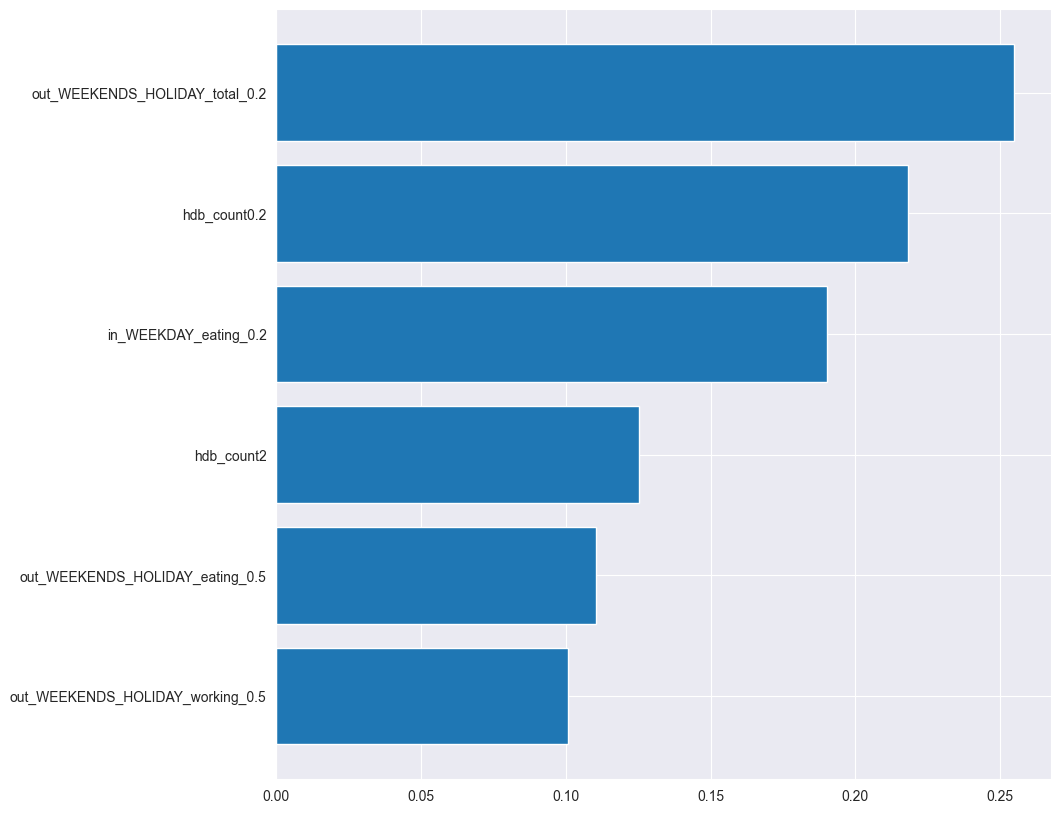

In [37]:
# change fig size to fit all the axis labels
plt.figure(figsize=(10,10))
best = rfc_bf.best_estimator_
f_i = list(zip(X.col,best.feature_importances_))
f_i.sort(key = lambda x : x[1])
plt.barh([x[0] for x in f_i],[x[1] for x in f_i])

plt.show()

[[ 3  0  5]
 [ 0  0  6]
 [ 1  0 13]]


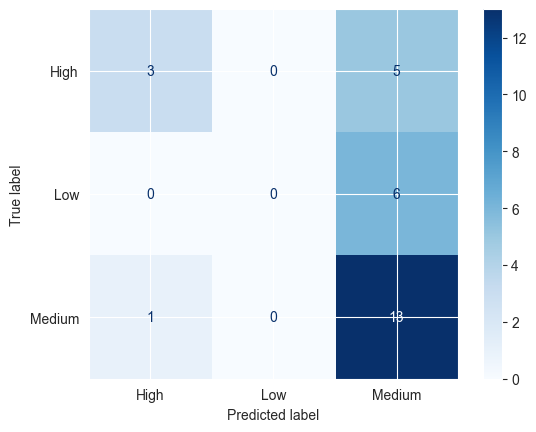

In [41]:
from sklearn.metrics import ConfusionMatrixDisplay
# Plot non-normalized confusion matrix
titles_options = [
    ("Confusion matrix, without normalization", None)
]

disp = ConfusionMatrixDisplay.from_estimator(
    rfc_bf.best_estimator_,
    X_test,
    y_test,
    display_labels=['High','Low','Medium'],
    cmap=plt.cm.Blues,
)

print(disp.confusion_matrix)

plt.show()